In [7]:
from cam import *
import tensorflow as tf
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

## A simple introduction of the steps we follow
* Load the model and its preprocessors.
* Find the last feature map's layer name.
* Remove the final activation layers if needed. (usually softmax)
* Use any predicted class indices (tiger, cat, lion) to get the gradient matrix in the final feature map.
* Convert gradient matrix to a vector and multiply it with feature map. we end up with NrxNcx1(example: 10x10x1) based on feature map intensity matrix which signifies the important areas model is focusing.
* we resize the intensity matrix to the original image size for visualization purpose.

## Example1 - ResNet50v2
### The last conv layer name for the corresponding model is ```post_relu```

tf.Tensor([385 101 386], shape=(3,), dtype=int32)
[('n02504013', 'Indian_elephant', 0.82823104),
 ('n01871265', 'tusker', 0.08764108),
 ('n02504458', 'African_elephant', 0.08400772)]


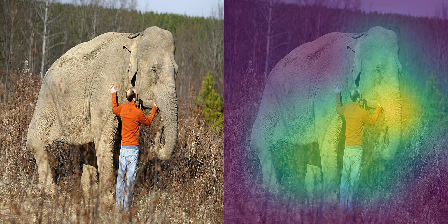

In [8]:
file_id = "assets/Elephant.jpg"
model_id = tf.keras.applications.resnet_v2.ResNet50V2(weights="imagenet")
size     = (224,224)

preprocessor = tf.keras.applications.resnet_v2.preprocess_input
decoder =tf.keras.applications.resnet_v2.decode_predictions
layer_id = 'post_relu' #last conv layer name

troubleshoot = TroubleShooter(model_id,layer_id,preprocessor)
img_array = troubleshoot.prepare_image(file_id,size)
pprint(troubleshoot.get_class_names(img_array,decoder=decoder))
troubleshoot.compute_cam(img_array)
troubleshoot.visualize(file_id,size)

## Example2 - EfficinetNetB0
### The last conv layer name for the corresponding model is ```top_activation```

tf.Tensor([386 385 101], shape=(3,), dtype=int32)
[('n02504458', 'African_elephant', 0.27421114),
 ('n02504013', 'Indian_elephant', 0.22732165),
 ('n01871265', 'tusker', 0.14003733)]


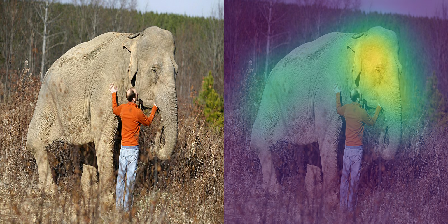

In [9]:
file_id = "assets/Elephant.jpg"
model_id = tf.keras.applications.efficientnet.EfficientNetB0(weights="imagenet")
size     = (224,224)

preprocessor = tf.keras.applications.efficientnet.preprocess_input
decoder =tf.keras.applications.efficientnet.decode_predictions
layer_id = 'top_activation' #last conv layer name

troubleshoot = TroubleShooter(model_id,layer_id,preprocessor)
img_array = troubleshoot.prepare_image(file_id,size)
pprint(troubleshoot.get_class_names(img_array,decoder=decoder))
troubleshoot.compute_cam(img_array)
troubleshoot.visualize(file_id,size)

## Example3 - Xception
### The last conv layer name for the corresponding model is ```block14_sepconv2_act```

tf.Tensor([385 386 101], shape=(3,), dtype=int32)
[('n02504013', 'Indian_elephant', 0.6489065),
 ('n02504458', 'African_elephant', 0.11635845),
 ('n01871265', 'tusker', 0.050665516)]


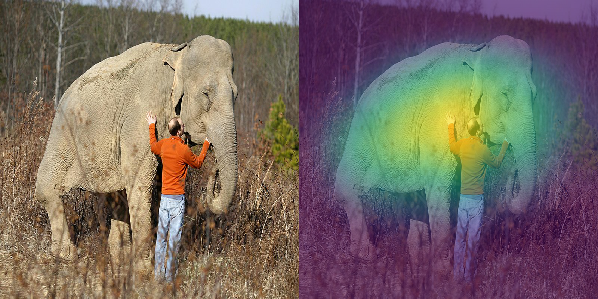

In [10]:
file_id = "assets/Elephant.jpg"
model_id = tf.keras.applications.xception.Xception(weights="imagenet")
size     = (299,299)

preprocessor = tf.keras.applications.xception.preprocess_input
decoder =tf.keras.applications.xception.decode_predictions
layer_id = 'block14_sepconv2_act' #last conv layer name

troubleshoot = TroubleShooter(model_id,layer_id,preprocessor)
img_array = troubleshoot.prepare_image(file_id,size)
pprint(troubleshoot.get_class_names(img_array,decoder=decoder))
troubleshoot.compute_cam(img_array)
troubleshoot.visualize(file_id,size)

### Visualizing custom class labels and its focused areas.

In [11]:
file_id = "assets/snake.jpg"
model_id = tf.keras.applications.xception.Xception(weights="imagenet")
size     = (299,299)

preprocessor = tf.keras.applications.xception.preprocess_input
decoder =tf.keras.applications.xception.decode_predictions
layer_id = 'block14_sepconv2_act' #last conv layer name

troubleshoot = TroubleShooter(model_id,layer_id,preprocessor)
img_array = troubleshoot.prepare_image(file_id,size)
pprint(troubleshoot.get_class_names(img_array,decoder=decoder))

tf.Tensor([292  62  61], shape=(3,), dtype=int32)
[('n02129604', 'tiger', 0.23348045),
 ('n01744401', 'rock_python', 0.18153207),
 ('n01742172', 'boa_constrictor', 0.03693086)]


#### Analyzing the predicted classes by manually passing the values for visualization ```[292  62  61]```

* ##### We can interpret passing the ```class label value=292``` we get **tiger** with high likelihood.

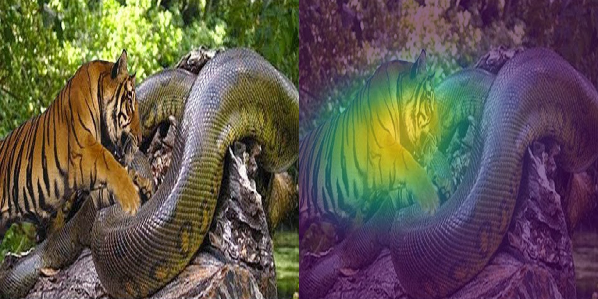

In [14]:
troubleshoot.compute_cam(img_array,compute_grad_class=292)
troubleshoot.visualize(file_id,size)

* ##### We can interpret passing the ```class label value=62``` we get **rock_python** with high likelihood.

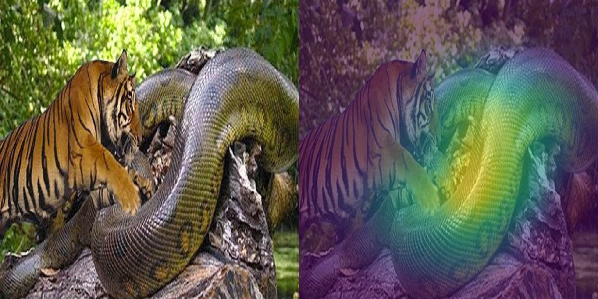

In [17]:
troubleshoot.compute_cam(img_array,compute_grad_class=62)
troubleshoot.visualize(file_id,size)